<a href="https://colab.research.google.com/github/CourseMate-Capstone-Project/ML/blob/main/CourseMate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
dataset = 'https://raw.githubusercontent.com/CourseMate-Capstone-Project/ML/refs/heads/main/Online_Courses.csv'

In [3]:
course = pd.DataFrame(pd.read_csv(dataset))

In [4]:
course.tail()

,Unnamed: 0,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,...,Course Short Intro,Weekly study,Premium course,What's include,Rank,Created by,Program,Number of ratings,Price,COURSE CATEGORIES
8087,143,Certified Scrum Master,https://www.simplilearn.com/certified-scrum-ma...,This Certified ScrumMaster® (CSM) certificatio...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,369,NaN,Agile and Scrum
8088,144,Salesforce Basics Course for Beginners,https://www.simplilearn.com/salesforce-course?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,348,NaN,Big Data
8089,145,ICP-ACC (ICAgile Certified Agile Coaching) Cer...,https://www.simplilearn.com/certified-agile-co...,This ICP-ACC Certification Training Course aim...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,301,NaN,Agile and Scrum
8090,146,/irisprodflip456,https://www.simplilearn.com/irisprodflip456?tag=,Iris Production check 456,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,293,NaN,Big Data Analytics
8091,147,Introduction to Industry 4.0,https://www.simplilearn.com/introduction-indus...,Introduction to Industry 4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,240,NaN,Business and Leadership


In [5]:
course.shape

(8092, 45)

In [6]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8092 non-null   int64  
 1   Title                  8092 non-null   object 
 2   URL                    8092 non-null   object 
 3   Short Intro            8040 non-null   object 
 4   Category               2819 non-null   object 
 5   Sub-Category           2819 non-null   object 
 6   Course Type            2819 non-null   object 
 7   Language               2819 non-null   object 
 8   Subtitle Languages     2802 non-null   object 
 9   Skills                 2099 non-null   object 
 10  Instructors            2808 non-null   object 
 11  Rating                 2742 non-null   object 
 12  Number of viewers      2695 non-null   object 
 13  Duration               7944 non-null   object 
 14  Site                   8092 non-null   object 
 15  Prog

In [7]:
course.describe()

,Unnamed: 0,Unique Projects,Price
count,8092.00000,0.0,65.000000
mean,1946.04214,NaN,903.830769
std,1346.92197,NaN,665.949617
min,0.00000,NaN,129.000000
25%,796.00000,NaN,534.000000
50%,1807.50000,NaN,855.000000
75%,2819.25000,NaN,1099.000000
max,4842.00000,NaN,4600.000000


In [8]:
course.isna().sum()

,0
Unnamed: 0,0
Title,0
URL,0
Short Intro,52
Category,5273
Sub-Category,5273
Course Type,5273
Language,5273
Subtitle Languages,5290
Skills,5993


<Axes: >

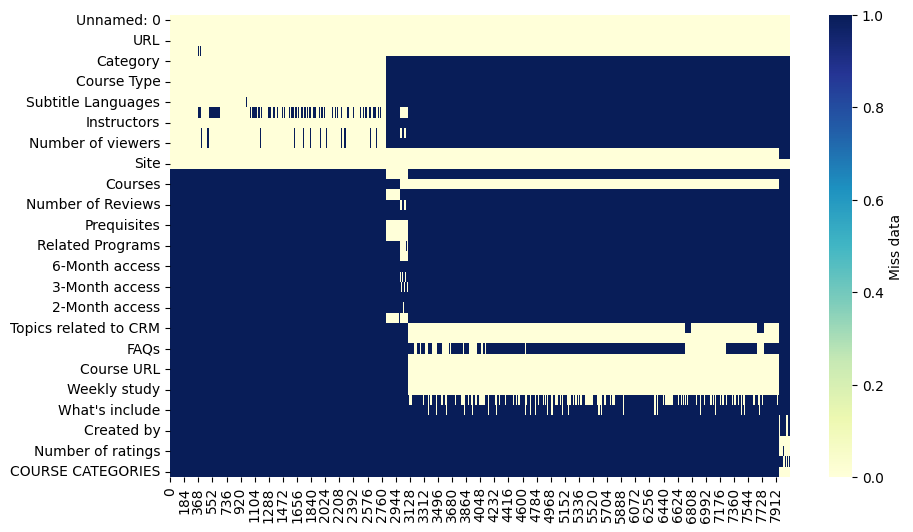

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(course.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Miss data'})

In [10]:
print("Jumlah duplikasi: ", course.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
course.head(), course.isnull().sum()

(   Unnamed: 0                                              Title  \
 0           0                    Machine Learning Specialization   
 1           1        Introduction to Data Science Specialization   
 2           2  Data Science Fundamentals with Python and SQL ...   
 3           3       Key Technologies for Business Specialization   
 4           4                       Deep Learning Specialization   
 
                                                  URL  \
 0  https://www.coursera.org/specializations/machi...   
 1  https://www.coursera.org/specializations/intro...   
 2  https://www.coursera.org/specializations/data-...   
 3  https://www.coursera.org/specializations/key-t...   
 4  https://www.coursera.org/specializations/deep-...   
 
                                          Short Intro      Category  \
 0  #BreakIntoAI with Machine Learning Specializat...  Data Science   
 1  Launch your career in data science. Gain found...  Data Science   
 2  Build the Foundation fo

In [95]:
# Columns to check for non-null values
required_columns = ["Title", "URL", "Short Intro", "Category", "Sub-Category", "Course Type", "Language", "Duration", "Site"]

# Hapus semua kolom kecuali yang ada dalam required_columns
filtered_courses = filtered_courses[required_columns]

# Cek hasilnya
print(filtered_courses.info())  # Untuk melihat struktur data
print(filtered_courses.head())


<class 'pandas.core.frame.DataFrame'>
Index: 2775 entries, 0 to 2818
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2775 non-null   object
 1   URL           2775 non-null   object
 2   Short Intro   2775 non-null   object
 3   Category      2775 non-null   object
 4   Sub-Category  2775 non-null   object
 5   Course Type   2775 non-null   object
 6   Language      2775 non-null   object
 7   Duration      2775 non-null   object
 8   Site          2775 non-null   object
dtypes: object(9)
memory usage: 216.8+ KB
None
                                               Title  \
0                    Machine Learning Specialization   
1        Introduction to Data Science Specialization   
2  Data Science Fundamentals with Python and SQL ...   
3       Key Technologies for Business Specialization   
4                       Deep Learning Specialization   

                                                 URL 

In [96]:
# Load the dataset yang sudah difilter sebelumnya (dengan 1960 rows)
course_data = filtered_courses.copy()

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text)         # Remove extra spaces
    return text

# Bersihkan kolom 'Short Intro'
course_data['Short Intro'] = course_data['Short Intro'].apply(clean_text)

# Membersihkan kolom Duration
course_data["Duration"] = course_data["Duration"].str.replace(r"Approximately|to complete", "", regex=True).str.strip()


In [93]:
# Melihat semua kategori unik yang ada di dataset
unique_categories = course_data['Category'].unique()
print("Kategori yang tersedia dalam dataset:")
print(unique_categories)


Kategori yang tersedia dalam dataset:
['Data Science' 'Business' 'Information Technology' 'Computer Science'
 'Arts and Humanities' 'Language Learning' 'Personal Development'
 'Social Sciences' 'Health' 'Physical Science and Engineering'
 'Math and Logic' '计算机科学' 'Ciencia de Datos' 'Negocios'
 'Ciencias de la Computación' 'Negócios' 'データサイエンス']


In [86]:
# Melihat semua sub-kategori unik yang ada di dataset
unique_categories = course_data['Sub-Category'].unique()
print("Sub-kategori yang tersedia dalam dataset:")
print(unique_categories)


Sub-kategori yang tersedia dalam dataset:
['Machine Learning' 'Data Analysis' 'Business Essentials'
 'Data Management' 'Security' 'Software Development' 'Cloud Computing'
 'Mobile and Web Development' 'Algorithms' 'Finance'
 'Leadership and Management' 'Design and Product' 'Music and Art'
 'Learning English' 'Entrepreneurship' 'Marketing' 'Business Strategy'
 'Personal Development' 'Governance and Society' 'Healthcare Management'
 'Networking' 'Education' 'Computer Security and Networks' 'Nutrition'
 'Public Health' 'Probability and Statistics' 'Electrical Engineering'
 'Basic Science' 'Patient Care' 'Health Informatics' 'Philosophy'
 'Environmental Science and Sustainability' 'Math and Logic'
 'Other Languages' 'Physics and Astronomy' 'Law' 'Biology'
 'Mechanical Engineering' 'Support and Operations' '移动和网络开发'
 'Análisis de Datos' 'Liderazgo y Gestión' 'Diseño y Producto' 'データ分析'
 'Research' 'Psychology' 'Economics' 'Research Methods' 'Chemistry'
 'History' 'Animal Health']


In [87]:
# Kategori yang akan dipertahankan
selected_categories = ['Data Science', 'Business', 'Information Technology', 'Computer Science', 'Arts and Humanities', 'Personal Development', 'Health', 'Physical Science and Engineering']

# Filter dataset
filtered_category = course_data[course_data['Category'].isin(selected_categories)]

# Hasil jumlah data
print(filtered_category['Category'].value_counts())


Category
Business                            883
Computer Science                    449
Data Science                        436
Health                              260
Information Technology              215
Physical Science and Engineering    147
Arts and Humanities                 120
Personal Development                 68
Name: count, dtype: int64


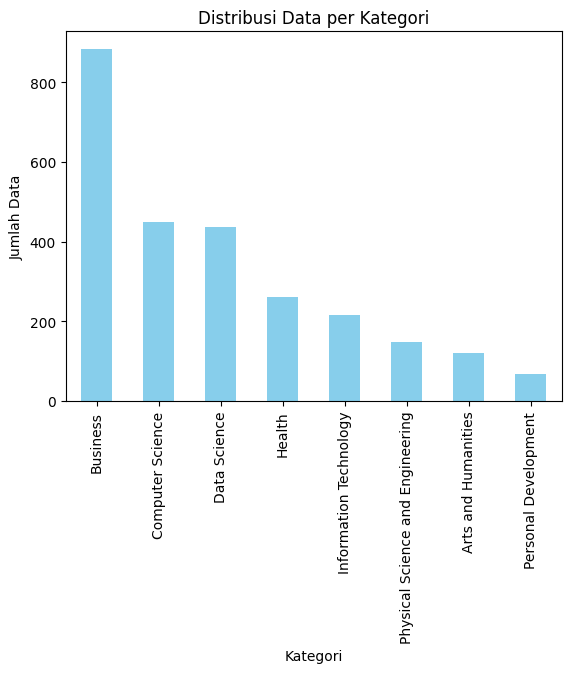

In [88]:
import matplotlib.pyplot as plt

# Visualisasi distribusi kategori
filtered_category['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Data per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()


In [89]:
# Menampilkan sub-category unik untuk setiap kategori yang dipilih
sub_category_per_category = filtered_category.groupby('Category')['Sub-Category'].unique()
print(sub_category_per_category)

Category
Arts and Humanities                              [Music and Art, Philosophy, History]
Business                            [Business Essentials, Finance, Leadership and ...
Computer Science                    [Software Development, Mobile and Web Developm...
Data Science                        [Machine Learning, Data Analysis, Probability ...
Health                              [Healthcare Management, Nutrition, Public Heal...
Information Technology              [Data Management, Security, Cloud Computing, N...
Personal Development                                           [Personal Development]
Physical Science and Engineering    [Electrical Engineering, Environmental Science...
Name: Sub-Category, dtype: object


In [90]:
# Menampilkan language unik untuk setiap kategori yang dipilih
sub_category_per_category = filtered_category.groupby('Category')['Language'].unique()
print(sub_category_per_category)

Category
Arts and Humanities                                                         [English]
Business                            [English, Portuguese (Brazilian), French, Germ...
Computer Science                    [English, Portuguese (Brazilian), French, Span...
Data Science                        [English, Portuguese (Brazilian), French, Arab...
Health                                                     [English, Spanish, French]
Information Technology                   [English, German, French, Spanish, Japanese]
Personal Development                                               [English, Spanish]
Physical Science and Engineering                                            [English]
Name: Language, dtype: object


In [91]:
# Fungsi rekomendasi berbasis kategori
def recommend_courses(user_category, data, top_n=5):
    # Filter data berdasarkan kategori yang dipilih
    category_filtered = data[data['Category'].str.lower() == user_category.lower()].copy()

    return category_filtered[["Title", "URL", "Short Intro", "Sub-Category", "Course Type", "Language", "Duration", "Site"]]

In [97]:
# Membuat widget input kategori
category_widget = widgets.Dropdown(
    options=selected_categories,
    description='Category:',
    disabled=False
)

# Fungsi untuk menampilkan hasil rekomendasi
def show_recommendations(user_category):
    # Mengambil data rekomendasi berdasarkan kategori
    recommended_courses = recommend_courses(user_category, course_data)

    # Menampilkan hanya 20 rekomendasi pertama
    recommended_courses = recommended_courses.head(15)

    # Menampilkan hasil
    print(f"Recommended Courses for Category: {user_category}\n")
    for idx, row in recommended_courses.iterrows():
        print(f"Title: {row['Title']}")
        print(f"Intro: {row['Short Intro']}")
        print(f"URL: {row['URL']}")
        print(f"Sub-Category: {row['Sub-Category']}")
        print(f"Course Type: {row['Course Type']}")
        print(f"Language: {row['Language']}")
        print(f"Duration: {row['Duration']}")
        print(f"Site: {row['Site']}")
        print("=" * 20)

# Menampilkan form input interaktif
widgets.interactive(show_recommendations,
                    user_category=category_widget)

interactive(children=(Dropdown(description='Category:', options=('Data Science', 'Business', 'Information Tech…